# **Mini-Project Data Mining (IT734A)- Identifying Exoplanets using Machine Learning**
### By-Aman Singhal, ID-a24amasi
### Dataset- https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Library for Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Library for Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# Reading the dataset

# Load the exoplanet dataset
df = pd.read_csv('/content/sample_data/cumulative.csv')

# Display the first few rows and basic information about the dataset
print("First few rows of the dataset:")
display(df.head())
print("\nDataset information:")
display(df.info())

First few rows of the dataset:


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  ko

None

## Data Pre-Processing

In [ ]:
# Checking out the target variable 'koi_disposition'
df['koi_disposition'].value_counts()

,count
koi_disposition,
FALSE POSITIVE,5023
CONFIRMED,2293
CANDIDATE,2248


In [ ]:
# Limiting the target feature and Filtering to keep only CONFIRMED and CANDIDATE dispositions
df = df[df['koi_disposition'].isin(['CONFIRMED', 'CANDIDATE'])]

# Verifying the updated distribution
print("Updated distribution of koi_disposition:")
print(df['koi_disposition'].value_counts())

Updated distribution of koi_disposition:
koi_disposition
CONFIRMED    2293
CANDIDATE    2248
Name: count, dtype: int64


In [ ]:
# Dropping the unused columns
columns_to_drop = ['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_score']
df = df.drop(columns=columns_to_drop)

# Printing the shape of the dataset after dropping unused columns
print(df.shape)

(4541, 44)


In [ ]:
# Checking for missing values in the data
print("\nMissing values in each column:")
print(df.isnull().sum())

# Displaying the percentage of missing values
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)


Missing values in each column:
koi_disposition         0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1        78
koi_period_err2        78
koi_time0bk             0
koi_time0bk_err1       78
koi_time0bk_err2       78
koi_impact             64
koi_impact_err1        78
koi_impact_err2        78
koi_duration            0
koi_duration_err1      78
koi_duration_err2      78
koi_depth              64
koi_depth_err1         78
koi_depth_err2         78
koi_prad               64
koi_prad_err1          64
koi_prad_err2          64
koi_teq                64
koi_teq_err1         4541
koi_teq_err2         4541
koi_insol              63
koi_insol_err1         63
koi_insol_err2         63
koi_model_snr          64
koi_tce_plnt_num       75
koi_tce_delivname      75
koi_steff              64
koi_steff_err1         72
koi_steff_err2         85
koi_slogg              64
koi_slogg_err1         72
koi_sl

In [ ]:
# Dropping the columns with all missing values
df = df.drop(['koi_teq_err1', 'koi_teq_err2'], axis=1)

# Printing the shape of the dataset after dropping columns
print("Shape after dropping columns:", df.shape)

Shape after dropping columns: (4541, 42)


In [ ]:
# Filling the missing values of categorical feature 'koi_tce_delivname' with mode
df['koi_tce_delivname'] = df['koi_tce_delivname'].fillna(df['koi_tce_delivname'].mode()[0])

In [ ]:
# Getting columns with missing values
columns_with_missing = df.columns[df.isna().sum() > 0]

# Filling the missing values with median for each column
for column in columns_with_missing:
    df[column] = df[column].fillna(df[column].median())

In [ ]:
# Verifying no more missing values
print("Columns with missing values after filling:")
print(df.isna().sum())

Columns with missing values after filling:
koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag    

In [ ]:
# Performing One Hot Encoding for the categorical feature 'koi_tce_delivname'
delivname_dummies=pd.get_dummies(df['koi_tce_delivname'], prefix='delivname', dtype=int)

df = pd.concat([df, delivname_dummies], axis=1)
df = df.drop('koi_tce_delivname', axis=1)

In [ ]:
# Printing the stats of our cleaned data
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,delivname_q1_q16_tce,delivname_q1_q17_dr24_tce,delivname_q1_q17_dr25_tce
count,4541.000000,4541.000000,4541.000000,4541.00000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,...,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000
mean,0.004625,0.012773,0.001321,0.00022,78.280898,0.001176,-0.001176,163.781792,0.008497,-0.008497,...,-0.124689,1.305730,0.248969,-0.231560,291.360528,44.159809,14.337594,0.051971,0.033473,0.914556
std,0.067854,0.112304,0.036330,0.01484,1931.630681,0.005256,0.005256,60.958053,0.020467,0.020467,...,0.080557,4.108106,0.427594,1.280073,4.810956,3.591258,1.269124,0.221993,0.179887,0.279572
min,0.000000,0.000000,0.000000,0.00000,0.259820,0.000000,-0.141600,120.565925,0.000009,-0.488000,...,-1.207000,0.109000,0.000000,-76.199000,280.206600,36.577381,7.748000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,5.082881,0.000017,-0.000263,133.921770,0.002050,-0.008760,...,-0.180000,0.819000,0.093000,-0.180000,287.608180,41.237461,13.598000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.00000,12.130704,0.000062,-0.000062,139.527810,0.004380,-0.004380,...,-0.112000,0.975000,0.194000,-0.098000,291.579160,44.121300,14.615000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.00000,35.622553,0.000263,-0.000017,170.932217,0.008760,-0.002050,...,-0.070000,1.229000,0.298000,-0.062000,295.228790,46.965130,15.317000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,129995.778400,0.141600,0.000000,907.044710,0.488000,-0.000009,...,0.000000,152.969000,15.454000,0.000000,301.720760,52.220341,17.475000,1.000000,1.000000,1.000000


In [ ]:
# Converting the target variable to numerical values where 1 represents CONFIRMED and 0 represents CANDIDATE
df['koi_disposition'] = df['koi_disposition'].map({'CONFIRMED': 1, 'CANDIDATE': 0})

## EDA

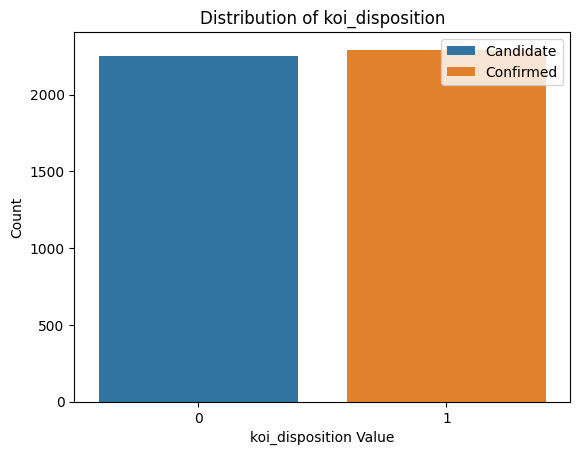

In [ ]:
# Plotting the distribution of the target feature
ax = sns.countplot(x='koi_disposition', data=df, hue='koi_disposition')
plt.title('Distribution of koi_disposition')
ax.legend(['Candidate', 'Confirmed'])
plt.xlabel('koi_disposition Value')
plt.ylabel('Count')
plt.show()

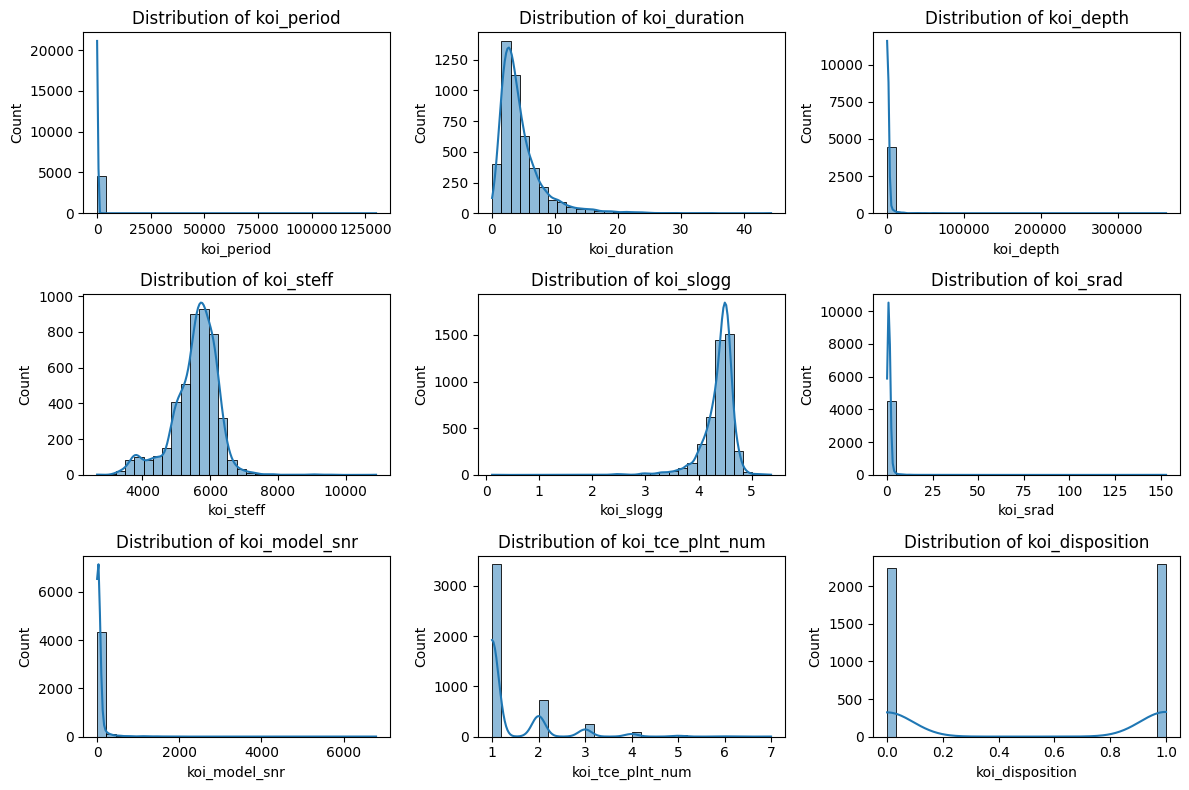

In [ ]:
# Selecting the important numerical features
numeric_features = ['koi_period', 'koi_duration', 'koi_depth', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_disposition']

# Creating subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Plotting the countplots of the features
for idx, feature in enumerate(numeric_features):
    sns.histplot(x=feature, data=df, bins=30, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# Printing the stats of our selected features
df[numeric_features].describe()

,koi_period,koi_duration,koi_depth,koi_steff,koi_slogg,koi_srad,koi_model_snr,koi_tce_plnt_num,koi_disposition
count,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000
mean,78.280898,4.565437,1478.121317,5558.417749,4.373149,1.305730,66.609073,1.368641,0.504955
std,1931.630681,3.667266,8886.985292,685.312989,0.321043,4.108106,258.959136,0.767009,0.500031
min,0.259820,0.052000,0.000000,2661.000000,0.114000,0.109000,0.000000,1.000000,0.000000
25%,5.082881,2.316100,162.400000,5231.000000,4.278000,0.819000,12.100000,1.000000,0.000000
50%,12.130704,3.498000,353.000000,5662.000000,4.449000,0.975000,20.700000,1.000000,1.000000
75%,35.622553,5.498000,763.800000,5999.000000,4.548000,1.229000,40.800000,1.000000,1.000000
max,129995.778400,44.350000,363130.000000,10894.000000,5.364000,152.969000,6788.800000,7.000000,1.000000


**Insights**
- The **Orbital Period (koi_period)** has a wide range with mean of 78.28 days and SD of 1931.6 days, with outliers having extremely upper range. This indicates most planets have shorter orbital periods, with outliers skewing the mean.
- The **Transit duraion (koi_duration)** indicates most transits are relatively short. Extremely long transits likely correspond to large planets or those far from their stars.
- High variability of **Transit Depth (koi_depth)** indicates planets of various sizes or observational conditions. The outliers suggest a few objects might be unusually large, like giant planets or eclipsing binaries.
- The **Stellar Effective Temperature (koi_steff)** indicates a mix of cooler stars (red dwarfs) and hotter stars (giants or massive main-sequence stars), wth most host stars are similar to the Sun (solar temperature ~5778 K).
- **Stellar Radius (koi_srad)** indicate most stars are 1.31 solar radii in size, but the range indicates some larger evolved stars.
- **Signal-to-Noise Ratio (koi_model_snr)** indicates a wide range in signal quality, with some very faint detections and others with strong signals.
- **Number of Planets Per System (koi_tce_plnt_num)** indicate most systems have one or two planets.

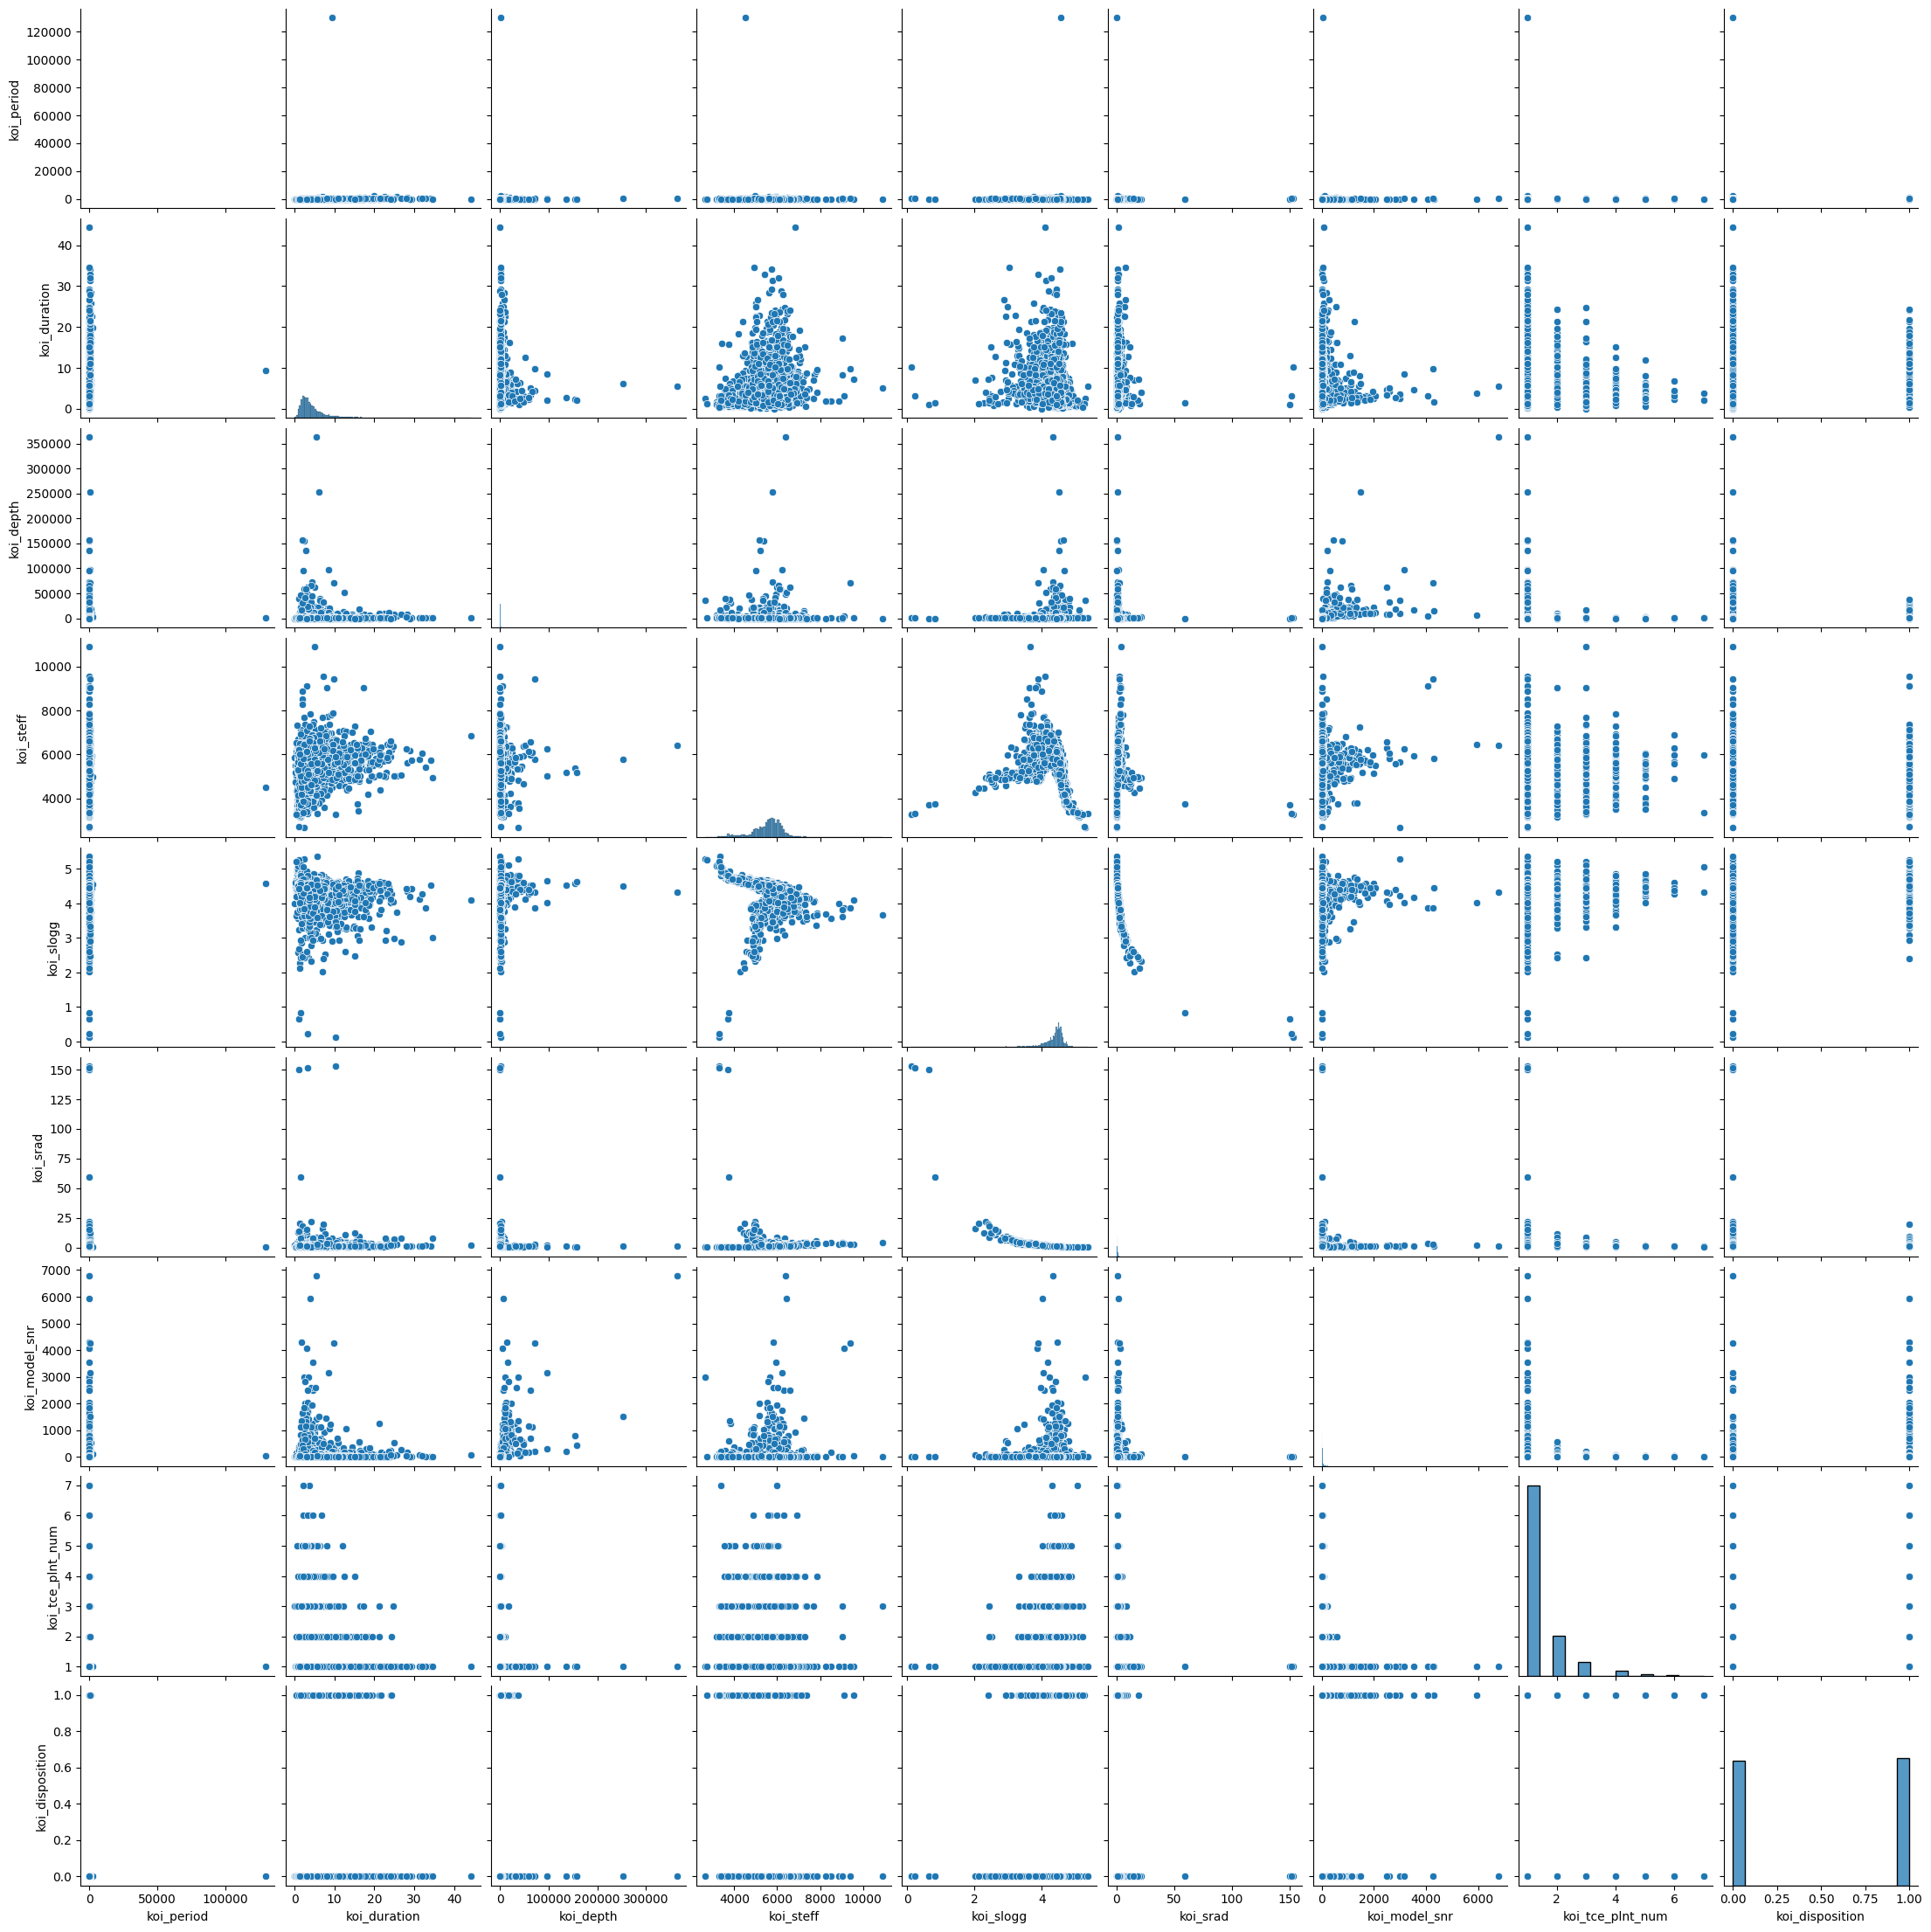

In [ ]:
# Plotting the pairplot of the features
sns.pairplot(df[numeric_features])
plt.show()

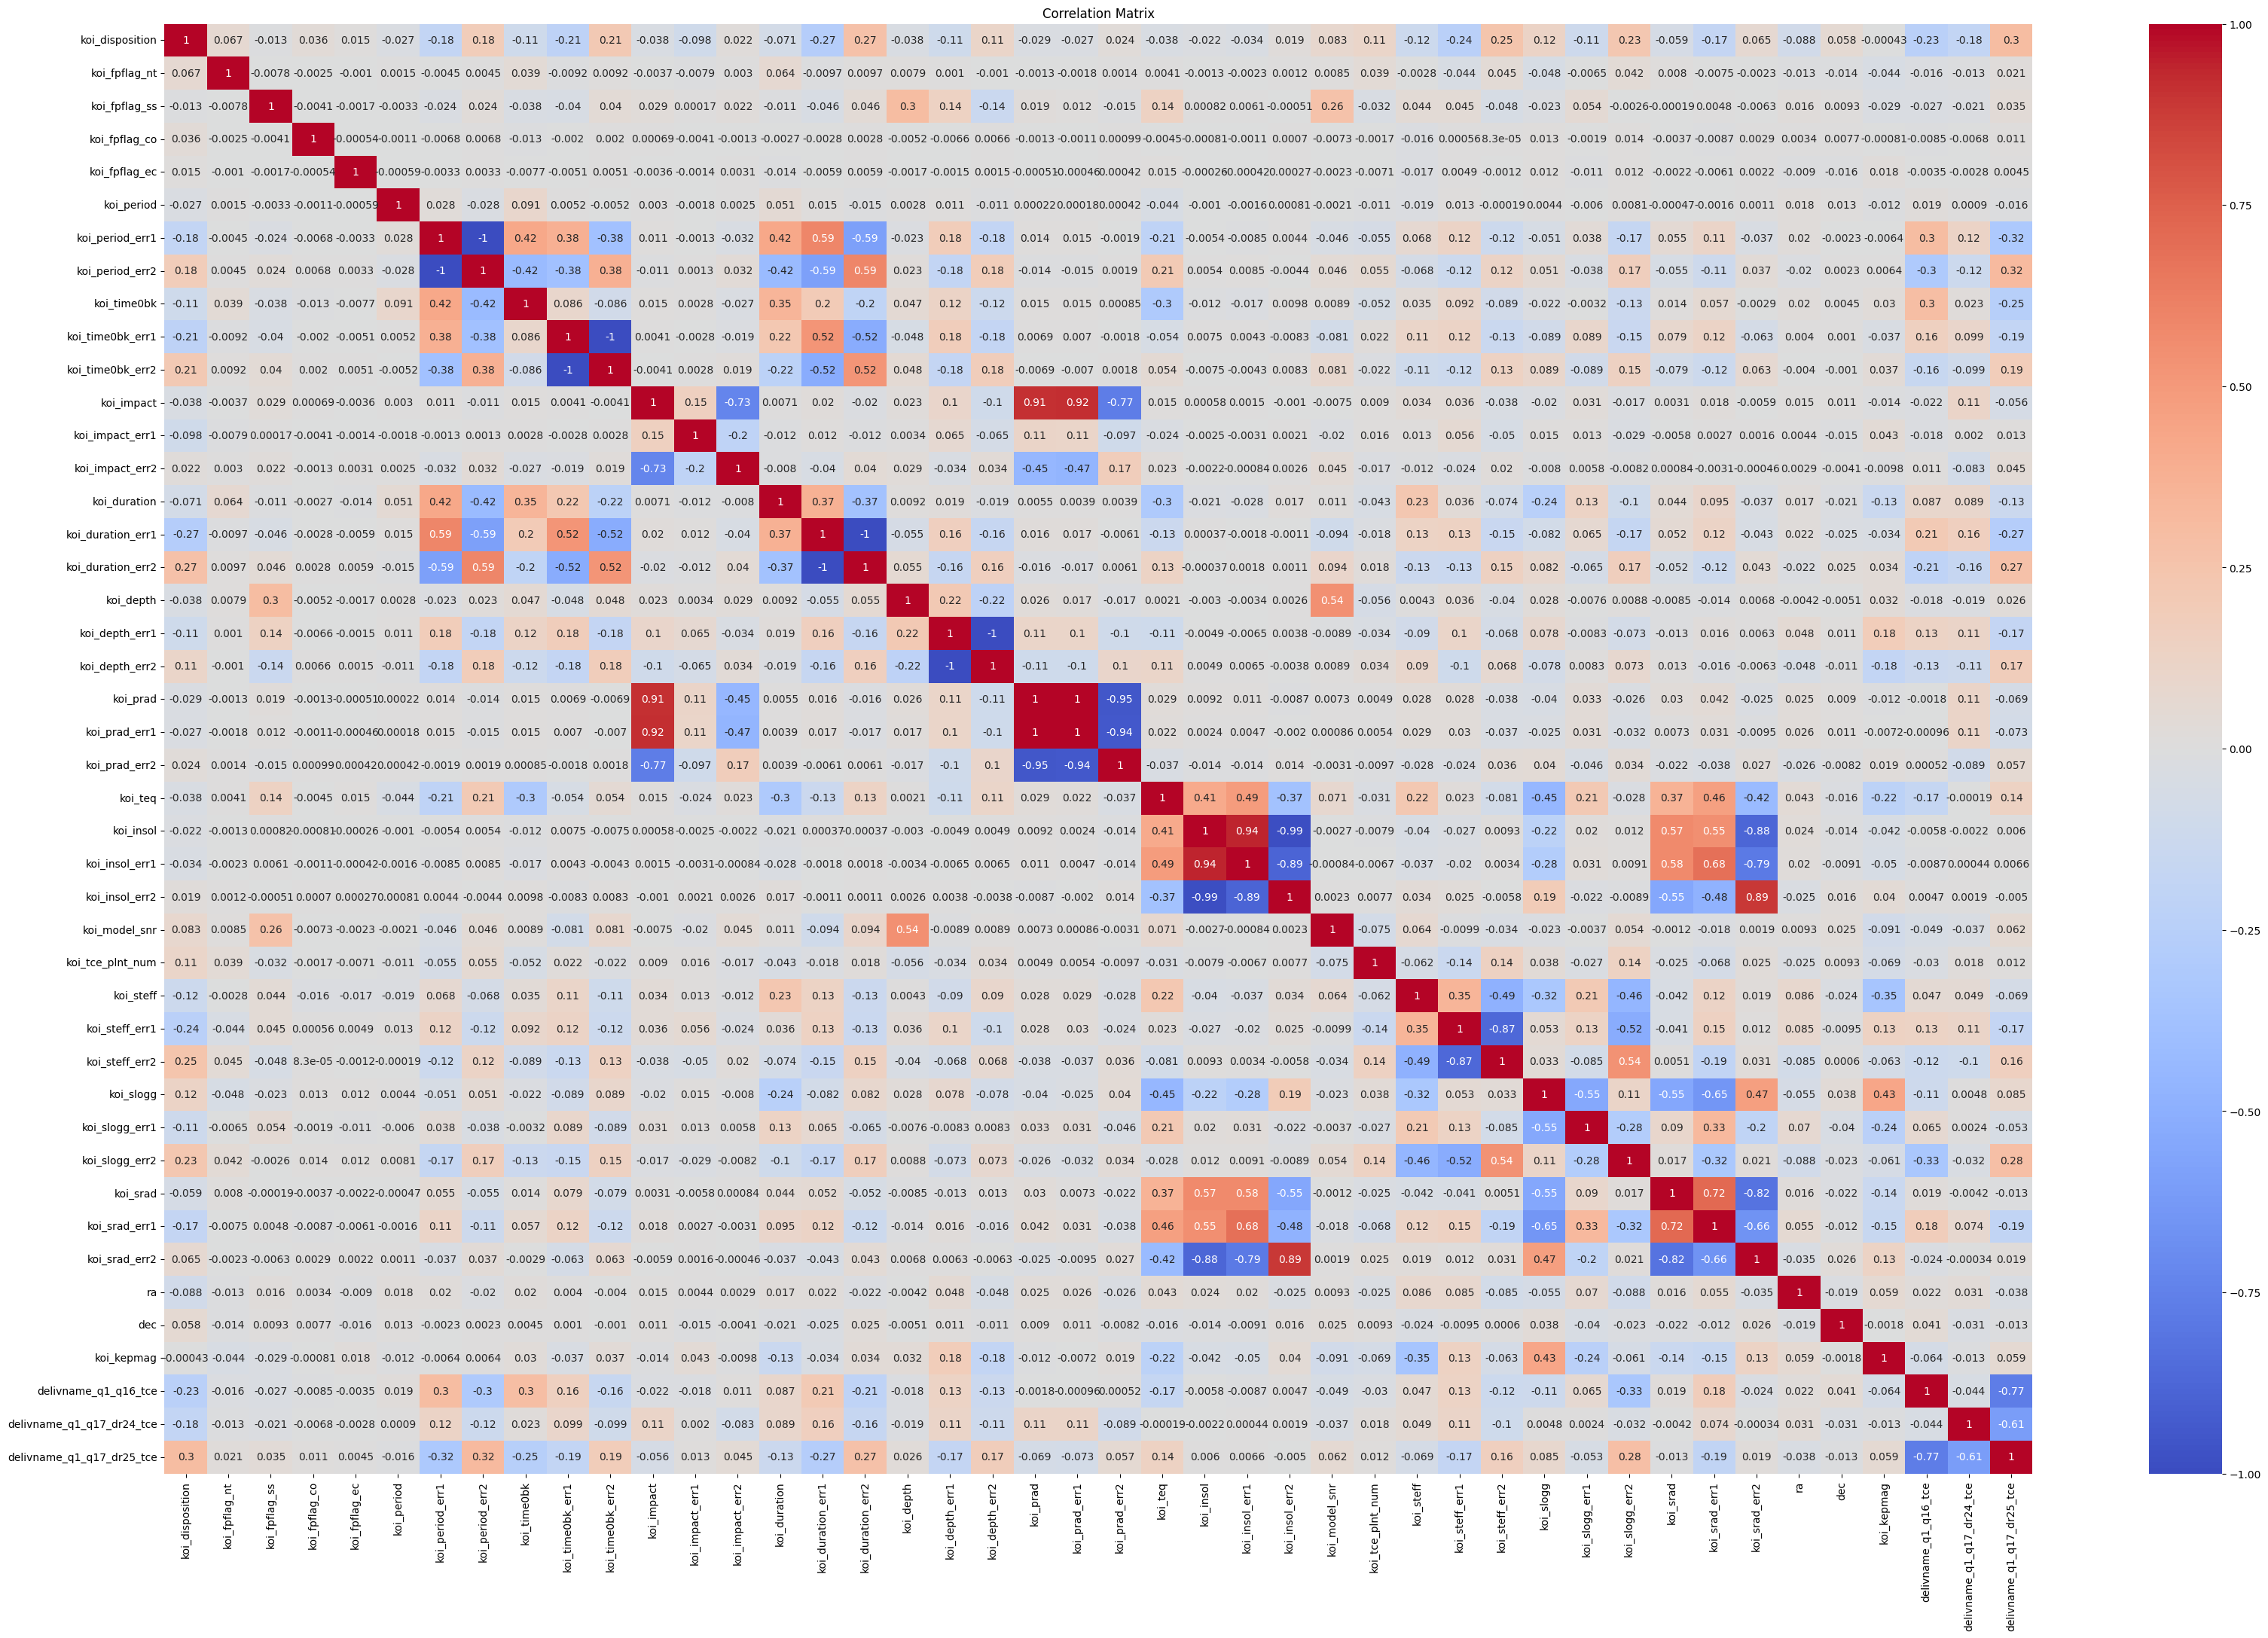

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(40, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [ ]:
# Filtering the features on the basis of Variance Threshold
X_all = df.drop('koi_disposition', axis=1)
y = df['koi_disposition']

numeric_cols = X_all.select_dtypes(include=[np.number]).columns
X_numeric = X_all[numeric_cols]

vt = VarianceThreshold(threshold=0.01)
X_numeric_reduced = vt.fit_transform(X_numeric)
kept_numeric_cols = numeric_cols[vt.get_support(indices=True)]

In [ ]:
# Creating the DataFrame for the reduced numeric columns
X_reduced = pd.DataFrame(X_numeric_reduced, columns=kept_numeric_cols)

In [ ]:
# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Printing the shape of the splits to verify
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (3632, 35) (3632,)
Test set size: (909, 35) (909,)


In [ ]:
# Scaling the features using Standard Scalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

In [ ]:
# Defining a helper function to compute all metrics and print confusion matrix

models_info = {}

def evaluate_model(name, model, X_test, y_test, is_probabilistic=True):
    y_pred = model.predict(X_test)

    # Print the basic metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # If the model can output predicted probabilities, compute ROC AUC
    if is_probabilistic:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        # Setting fallback for models that may not provide predict_proba
        roc_auc = np.nan

    # Evaluating the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    print(f"{name} Metrics:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print(f"  ROC AUC:   {roc_auc:.4f}")
    print("")

    return [acc, prec, rec, f1, roc_auc]

### Logistic Regression

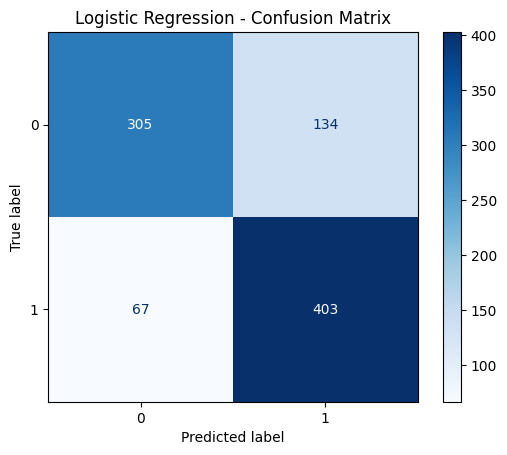

Logistic Regression Metrics:
  Accuracy:  0.7789
  Precision: 0.7505
  Recall:    0.8574
  F1 Score:  0.8004
  ROC AUC:   0.8727



In [ ]:
# Classification using Logistic Regression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

logreg_metrics = evaluate_model("Logistic Regression", logreg, X_test_scaled, y_test)
models_info["LogisticRegression"] = logreg_metrics

### K-Nearest Neighbour

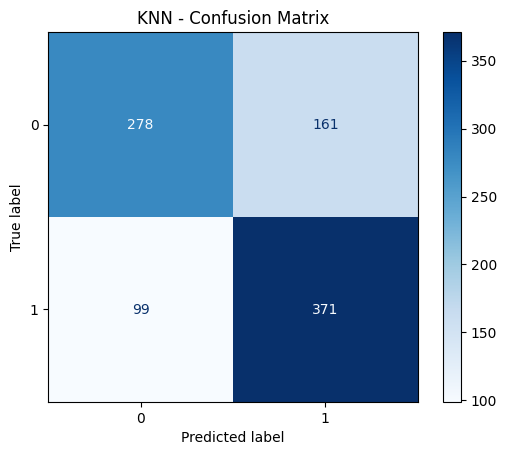

KNN Metrics:
  Accuracy:  0.7140
  Precision: 0.6974
  Recall:    0.7894
  F1 Score:  0.7405
  ROC AUC:   0.7950



In [ ]:
# Classification using KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_metrics = evaluate_model("KNN", knn, X_test_scaled, y_test)
models_info["KNN"] = knn_metrics

### Naive Bayes

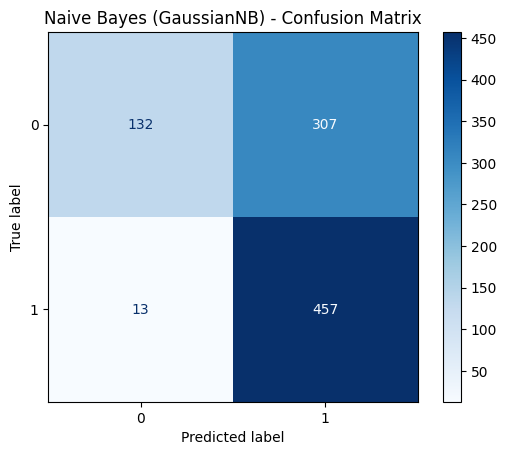

Naive Bayes (GaussianNB) Metrics:
  Accuracy:  0.6480
  Precision: 0.5982
  Recall:    0.9723
  F1 Score:  0.7407
  ROC AUC:   0.6836



In [ ]:
# Classification using Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

nb_metrics = evaluate_model("Naive Bayes (GaussianNB)", nb, X_test_scaled, y_test)
models_info["NaiveBayes"] = nb_metrics

### SVM

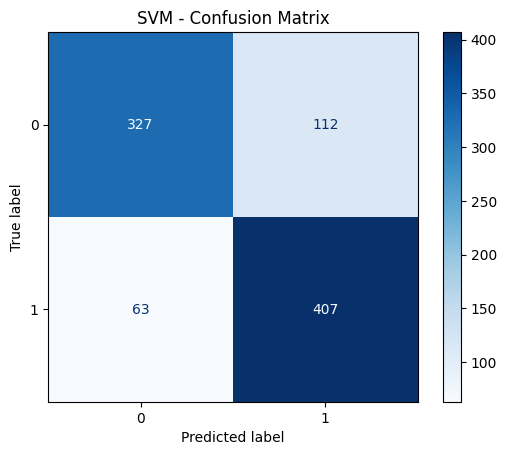

SVM Metrics:
  Accuracy:  0.8075
  Precision: 0.7842
  Recall:    0.8660
  F1 Score:  0.8231
  ROC AUC:   0.8788



In [ ]:
# Classification using SVM

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

svm_metrics = evaluate_model("SVM", svm, X_test_scaled, y_test)
models_info["SVM"] = svm_metrics

### Decicion Tree

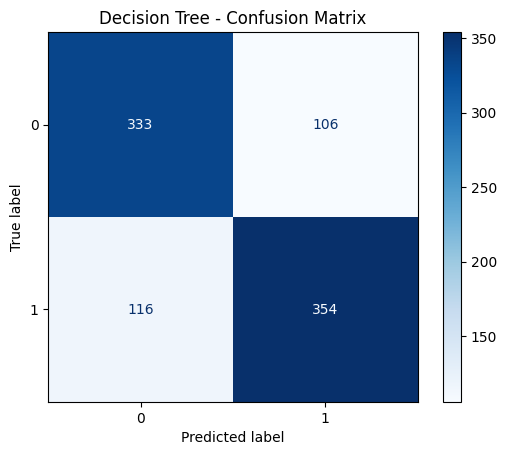

Decision Tree Metrics:
  Accuracy:  0.7558
  Precision: 0.7696
  Recall:    0.7532
  F1 Score:  0.7613
  ROC AUC:   0.7559



In [ ]:
# Classification using Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

dt_metrics = evaluate_model("Decision Tree", dt, X_test_scaled, y_test, is_probabilistic=True)
models_info["DecisionTree"] = dt_metrics

### RandomForest

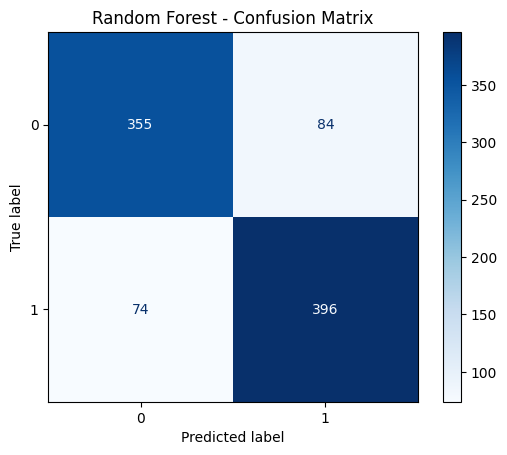

Random Forest Metrics:
  Accuracy:  0.8262
  Precision: 0.8250
  Recall:    0.8426
  F1 Score:  0.8337
  ROC AUC:   0.9021



In [ ]:
# Classification using Ensemble method- RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

rf_metrics = evaluate_model("Random Forest", rf, X_test_scaled, y_test)
models_info["RandomForest"] = rf_metrics

### Gradient Boosting

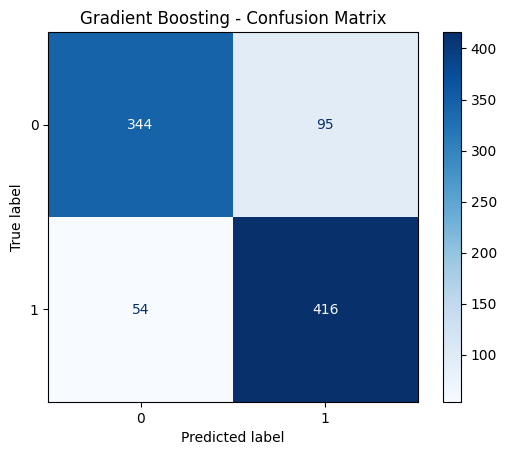

Gradient Boosting Metrics:
  Accuracy:  0.8361
  Precision: 0.8141
  Recall:    0.8851
  F1 Score:  0.8481
  ROC AUC:   0.9048



In [ ]:
# Classification using Ensemble Method- Gradient Boosting

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

gb_metrics = evaluate_model("Gradient Boosting", gb, X_test_scaled, y_test)
models_info["GradientBoosting"] = gb_metrics

### Neural Network

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


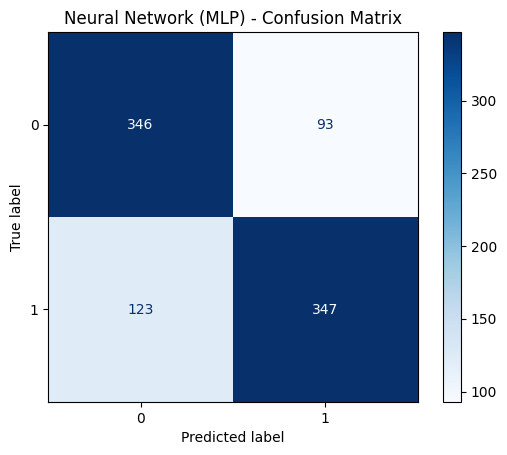

Neural Network (MLP) Metrics:
  Accuracy:  0.7624
  Precision: 0.7886
  Recall:    0.7383
  F1 Score:  0.7626
  ROC AUC:   0.8423



In [ ]:
# Classification using Neural Network

nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=500,
    random_state=42
)
nn.fit(X_train_scaled, y_train)

nn_metrics = evaluate_model("Neural Network (MLP)", nn, X_test_scaled, y_test)
models_info["Neural Network (MLP)"] = nn_metrics

### Hyperparameter Tuning


KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


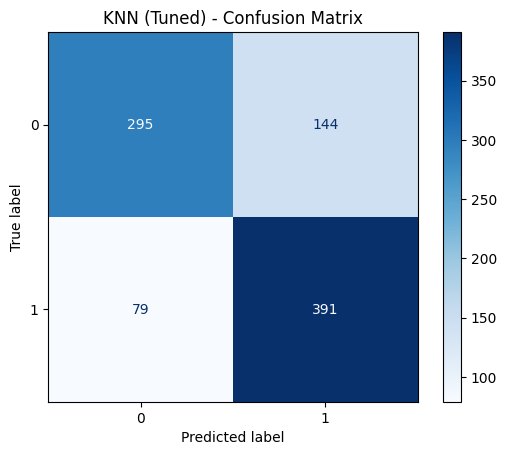

KNN (Tuned) Metrics:
  Accuracy:  0.7547
  Precision: 0.7308
  Recall:    0.8319
  F1 Score:  0.7781
  ROC AUC:   0.8502



In [ ]:
# Performing Hyperparameter Tuning for getting the best parameters for KNN and evaluating the model
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_base = KNeighborsClassifier()
grid_knn = GridSearchCV(
    knn_base,
    param_grid_knn,
    scoring='f1',
    cv=3,
    n_jobs=-1
)
grid_knn.fit(X_train_scaled, y_train)

knn_best = grid_knn.best_estimator_
print("KNN Best Params:", grid_knn.best_params_)

knn_metrics_best = evaluate_model("KNN (Tuned)", knn_best, X_test_scaled, y_test)
models_info["KNN (Tuned)"] = knn_metrics_best

RF Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


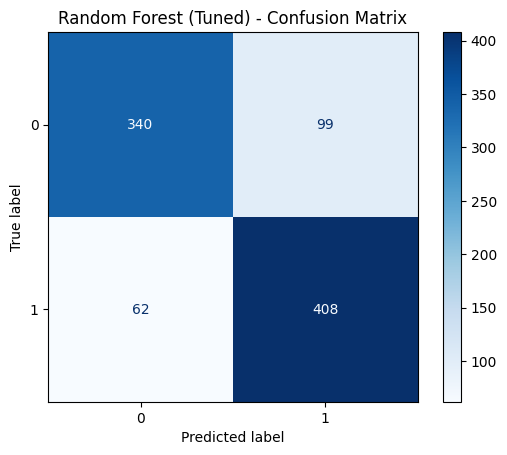

Random Forest (Tuned) Metrics:
  Accuracy:  0.8229
  Precision: 0.8047
  Recall:    0.8681
  F1 Score:  0.8352
  ROC AUC:   0.9005



In [ ]:
# Performing Hyperparameter Tuning for getting the best parameters for RandomForest and evaluating the model
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf_base = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(
    rf_base,
    param_grid_rf,
    scoring='f1',
    cv=3,
    n_jobs=-1
)
grid_rf.fit(X_train_scaled, y_train)

# Printing the best parameters for RF model
rf_best = grid_rf.best_estimator_
print("RF Best Params:", grid_rf.best_params_)

rf_metrics_tuned = evaluate_model("Random Forest (Tuned)", rf_best, X_test_scaled, y_test)
models_info["Random Forest (Tuned)"] = rf_metrics_tuned

### Feature Importance using Randomforest

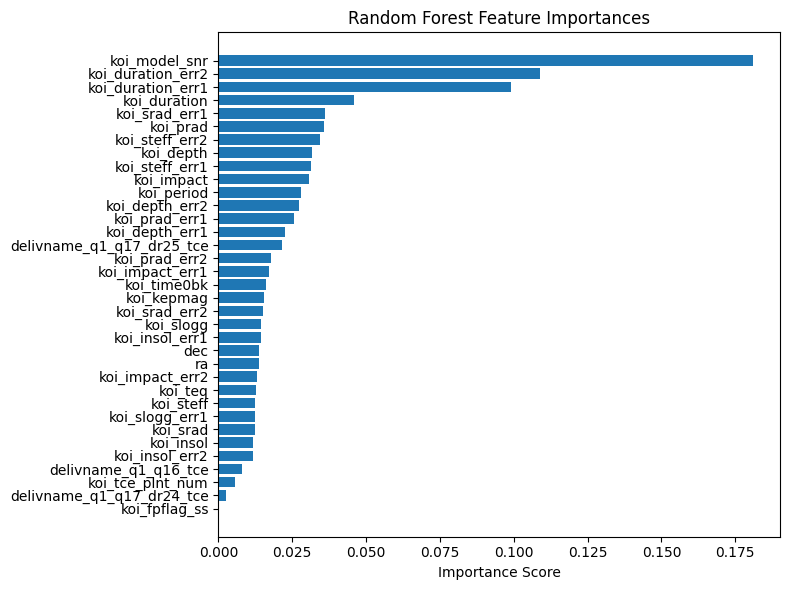

In [ ]:
# Finding out the important features that helps in classification of Exoplanets
importances = rf_best.feature_importances_

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort the feature importances (descending order) for a neat display
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_features)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.gca().invert_yaxis()  # Keeping the highest importance at the top
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

## Performance Evaluation

In [ ]:
# Comparing the Performance of all the Models

results_df = pd.DataFrame(
    models_info,
    index=["Accuracy", "Precision", "Recall", "F1_Score", "ROC_AUC"]
).T

print("===== Model Comparison =====")
display(results_df)

===== Model Comparison =====


,Accuracy,Precision,Recall,F1_Score,ROC_AUC
LogisticRegression,0.778878,0.750466,0.857447,0.800397,0.872655
KNN,0.713971,0.697368,0.789362,0.740519,0.795042
NaiveBayes,0.647965,0.598168,0.972340,0.740681,0.683568
SVM,0.807481,0.784200,0.865957,0.823054,0.878803
DecisionTree,0.755776,0.769565,0.753191,0.761290,0.755867
RandomForest,0.826183,0.825000,0.842553,0.833684,0.902084
GradientBoosting,0.836084,0.814090,0.885106,0.848114,0.904762
Neural Network (MLP),0.762376,0.788636,0.738298,0.762637,0.842301
KNN (Tuned),0.754675,0.730841,0.831915,0.778109,0.850153
Random Forest (Tuned),0.822882,0.804734,0.868085,0.835210,0.900548
